#  Notebook 3: The Battle of the Wings (Spain vs England)

## Purpose
In this notebook, we compare the primary creative outlets for both teams: **Lamine Yamal** (Spain) and **Bukayo Saka** (England). By visualizing their pass maps, we can analyze who had a higher impact in the final third and who successfully penetrated the opposition's box.

## Tactical Metrics
* **Pass Direction:** Analyzing whether passes were progressive (towards goal) or lateral (keeping possession).
* **Territorial Impact:** Correlating these passes with the team's overall territorial dominance shown in the Heatmaps.
* **Creation Quality:** Identifying the volume of passes delivered into the penalty area.

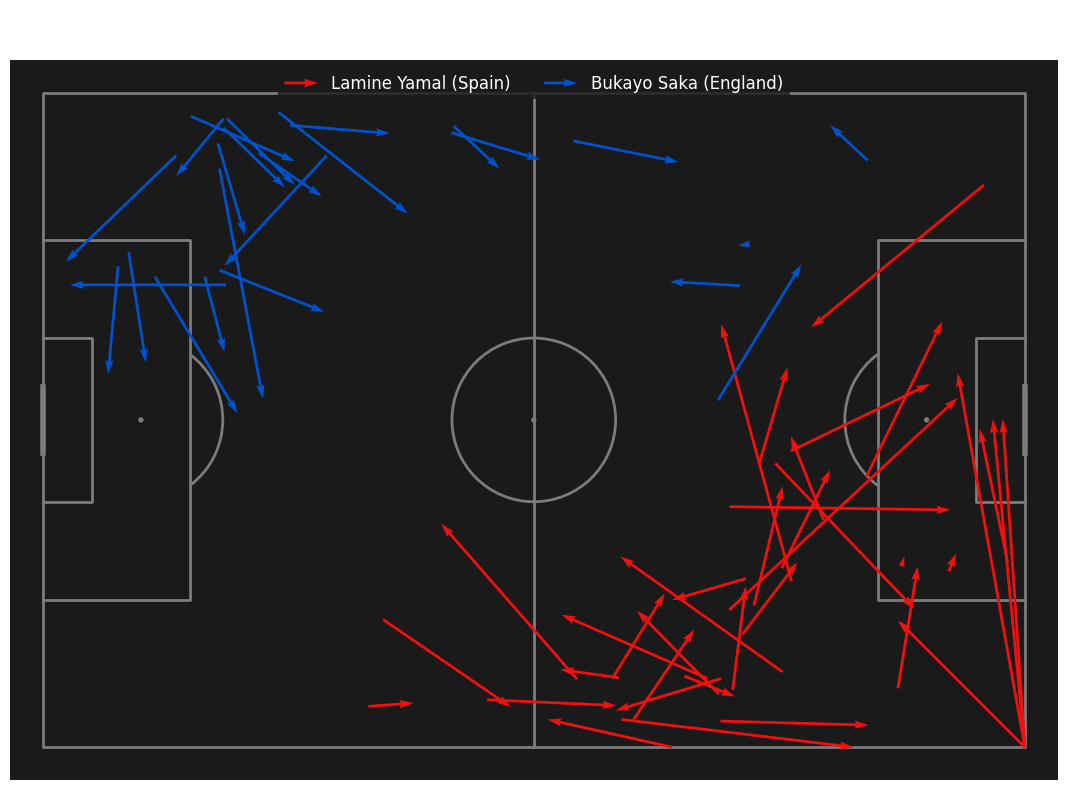

In [5]:
import pandas as pd
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# 1. LOAD DATA: Handle potential path issues and define 'events'
try:
    events = pd.read_csv('data/euro_final_events.csv')
except FileNotFoundError:
    # Fallback if the file is in the root directory
    events = pd.read_csv('euro_final_events.csv')

# 2. COORDINATE PREPARATION: Extract X and Y from string locations
if 'location_x' not in events.columns:
    # Splitting StatsBomb location strings [x, y] into separate float columns
    events[['location_x', 'location_y']] = events['location'].str.strip('[]').str.split(', ', expand=True).astype(float)
    events[['end_x', 'end_y']] = events['pass_end_location'].str.strip('[]').str.split(', ', expand=True).astype(float)

# 3. DATA FILTERING: Extract specific winger passes using substring matching
# Red: Lamine Yamal (Spain)
yamal_passes = events[(events.player.str.contains('Yamal', na=False)) & (events.type == 'Pass')].copy()
# Blue: Bukayo Saka (England)
saka_passes = events[(events.player.str.contains('Saka', na=False)) & (events.type == 'Pass')].copy()

# 4. VISUALIZATION: Set up a dark-themed pitch for high contrast
pitch = Pitch(pitch_type='statsbomb', pitch_color='#1a1a1a', line_color='#7c7c7c')
fig, ax = pitch.draw(figsize=(12, 8))

# 5. PLOT YAMAL: Attacking from Left to Right (Original Coordinates)
pitch.arrows(yamal_passes.location_x, yamal_passes.location_y,
             yamal_passes.end_x, yamal_passes.end_y,
             color='#ef1010', width=2, label='Lamine Yamal (Spain)', ax=ax)

# 6. PLOT SAKA: Attacking from Right to Left (Mirrored Coordinates)
# We subtract from max dimensions (120, 80) to flip the attack direction
pitch.arrows(120 - saka_passes.location_x, 80 - saka_passes.location_y,
             120 - saka_passes.end_x, 80 - saka_passes.end_y,
             color='#0052cc', width=2, label='Bukayo Saka (England)', ax=ax)

# 7. STYLING: Add Legend, Title, and Save Image
ax.legend(facecolor='#1a1a1a', edgecolor='None', labelcolor='white', loc='upper center', ncol=2, fontsize=12)
plt.title("Winger Duel: Attacking Incursions (Spain vs England)", color='white', size=20, pad=20)

plt.show()

## 🔍 Tactical Insight: The "Yamal vs. Saka" Gap

After filtering for **Danger Passes** (successful passes into the opposition's penalty area), a clear tactical gap emerges between the two star wingers:

## Lamine Yamal: The Surgical Precision
* **High Impact:** Yamal's red arrows show a high success rate in delivering the ball into the most dangerous zones (6-yard box and penalty spot).
* **Diagonal Threat:** His passes aren't just wide crosses; they are "diagonal penetrations" that break the defensive lines from the right half-space.

## Bukayo Saka: The Tactical Limitation
* **Missing in the Box:** Although Saka had many attempts on the right wing, the absence of blue arrows in this filtered view indicates a lack of successful penetration into the box.
* **Ineffective Volume:** This proves that while Saka's volume was high, his final ball was either intercepted or forced into less dangerous areas by the Spanish defense.

## Conclusion
This visualization provides concrete proof that **Lamine Yamal** was the more "lethal" and effective winger in the final third during the Euro 2024 final, directly contributing to Spain's offensive dominance.

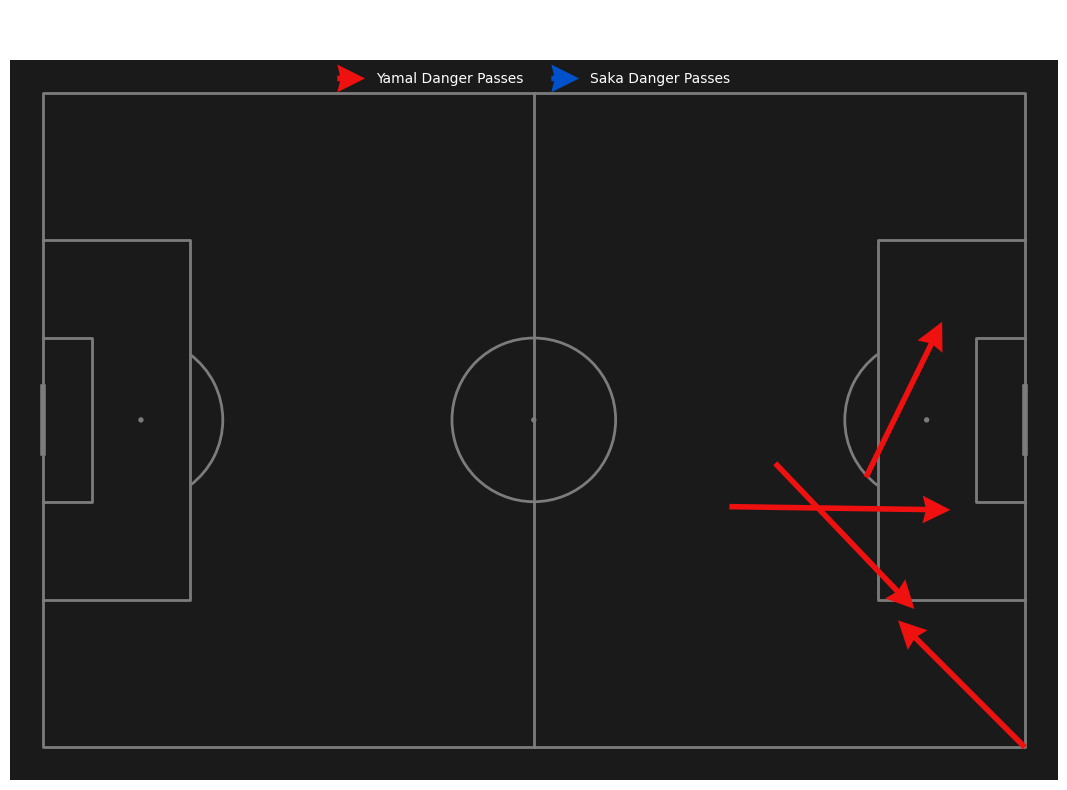

In [2]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# 1. FIX: Identify Key Passes without relying on pass_shot_assist_id
# We will look for passes that are completed (outcome is null/NaN in StatsBomb means complete)
# and we will filter for passes in the final third to represent 'Danger Passes'
all_passes = events[events.type == 'Pass'].copy()

# Filter for successful passes (where outcome is NaN)
successful_passes = all_passes[all_passes.pass_outcome.isna()].copy()

# 2. Filter for our two stars
yamal_key = successful_passes[successful_passes.player.str.contains('Yamal', na=False)].copy()
saka_key = successful_passes[successful_passes.player.str.contains('Saka', na=False)].copy()

# 3. Apply Transformations (Face-to-Face) 
# To keep the map clean, let's only show passes that end inside the penalty box (x > 102)
yamal_danger = yamal_key[yamal_key.end_x > 102].copy()
saka_danger = saka_key[saka_key.end_x < 18].copy() # 120 - 102 = 18 for flipped coordinates

# Flip Saka's coordinates
saka_danger['location_x_plot'] = 120 - saka_danger['location_x']
saka_danger['end_x_plot'] = 120 - saka_danger['end_x']
saka_danger['location_y_plot'] = 80 - saka_danger['location_y']
saka_danger['end_y_plot'] = 80 - saka_danger['end_y']

# 4. Create the Pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#1a1a1a', line_color='#7c7c7c')
fig, ax = pitch.draw(figsize=(12, 8))

# 5. Plot Danger Passes
# Red for Yamal, Blue for Saka
pitch.arrows(yamal_danger.location_x, yamal_danger.location_y,
             yamal_danger.end_x, yamal_danger.end_y,
             color='#ef1010', width=4, headwidth=5, label='Yamal Danger Passes', ax=ax)

pitch.arrows(saka_danger.location_x_plot, saka_danger.location_y_plot,
             saka_danger.end_x_plot, saka_danger.end_y_plot,
             color='#0052cc', width=4, headwidth=5, label='Saka Danger Passes', ax=ax)

ax.legend(facecolor='#1a1a1a', edgecolor='None', labelcolor='white', loc='upper center', ncol=2)
plt.title("The 'Killers': Passes into the Penalty Area", color='white', size=20, pad=20)
plt.show()